# Programación paralela 2 - DevCloud y Jupyter notebooks

Plataforma equipada con kernels para usar diferentes lenguajes de programación como C++, Python, R, Julia, etc., sin la necesidad de instalar alguno de estos programas. Tal vez la aplicación más conocida de Jupyter notebooks es con Python y [Anaconda](https://anaconda.org/anaconda/jupyter). 
DevCloud cuenta con una plataforma de Jupyter notebooks que puede ser encontrada en el siguiente [link](https://devcloud.intel.com/oneapi/get_started). No olvidar estar conectado a DevCloud. Un vez abierto Jupyter notebooks, seleccionar un kernel para poder ejecutar los procesos en DevCloud. 
La interfaz de Jupyter notebooks que contiene los notebooks donde podemos visualizar código y resultados juntos, alternando programas y Markdown. La consola se asemeja al terminal o shell y es favorable para proyectos pequeños. Asimismo tenemos otros que incluyen el terminal de DevCloud (similar a lo que se visualiza en MobaXterm), archivos Markdown, Python IDLE, etc. Cada vez que se requiera, se puede hacer click en cada uno para abrir y guardar. 

## Ejemplo 1: Python y Jupyter notebooks

En este ejercio vamos a probar un ejemplo simple en python. Por ejemplo, comencemos importanto el paquete numérico numpy que es muy usado en python y el paquete matplotlib para poder hacer gráficos. 

In [1]:
import numpy  as np
import matplotlib.pyplot as plt

Vamos a crear una función super simple que es la función seno. Para ello primero creamos un vector x que tiene un intervalo de 2$\pi$ a 10$\pi$ y luego un vector y que corre la función seno. Con el comando plt.plot se puede plotear la función seno. 

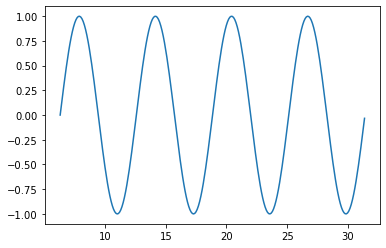

In [2]:
x = np.arange(2*np.pi,10*np.pi,0.1)   # inicio,final,intervalo
y = np.sin(x)

plt.plot(x,y)
plt.show()

## Ejemplo 2: Subir un job a través de Jupyter notebooks

Similar como hicimos en DevCloud podemos subir un job con el comando !qsub y nuestro archivo que escribimos con la extensión .pbs or .sh, etc. Primero vamos a crear el archivo de extensión .pbs con la función %%writefile.

In [3]:
%%writefile ejemplo_3.pbs
#PBS -S /bin/bash
#
#PBS -N ejemplo_3
#PBS -l nodes=1,walltime=00:05:00
#
#imprimir la hora y la fecha
date

#esperar 10 segundos
sleep 10

#imprimir la hora y la fecha otra vez
date

Writing ejemplo_3.pbs


Se sube el job con la función !qsub en lugar de solo qsub como se hacía en el terminal de DevCloud. Una vez que se haya aceptado el job, se va a generar como un código y ese código puede ayudar a revisar el resultado del job una vez que haya terminado de correr. 

In [4]:
!qsub ejemplo_3.pbs

1987988.v-qsvr-1.aidevcloud


Podemos usar !qstat para poder ver el status de nuestro job

In [5]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1987936.v-qsvr-1           ...ub-singleuser u163586         00:00:32 R jupyterhub     
1987988.v-qsvr-1           ejemplo_3        u163586                0 R batch          


Existe dos outputs que se producen cuando se sube un job. El archivo con extensión ".o" nos muestra el resultado del job y el archivo de extensión ".e" nos muestra si hay algún error.

## Ejercicio 3 : Hello world

Vamos a realizar el típico programa hello world en C y en C++. 

### Ejercicio de Hello World en C

- “writefile” permite escribir un código en jupyter notebooks y guardarlo como file. En este caso y dado que queremos escribir un archivo fuente en C vamos a colocar luego de writefile el nombre de nuestro file con la extensión .cpp. 
- Para inicializar el archivo, debemos de usar en el inicio "#include <stdio.h>" que indica al compilador insertar el contenido de la librería estandar stdio en el archivo fuente que estamos creando.
- Finalmente escribimos el cuerpo de la función “hello world”: int main indica que nuestra función debe regresar un valor integer al final de la ejecución del programa. Por ello, como buena práctica terminamos el código con return 0;. La función “printf” viene del término en inglés imprimir con formato "print formatted" e imprime un string o conjunto de caracteres en C. Para mayor información, visitar el siguiente [link](https://cplusplus.com/reference/cstdio/printf/).

In [6]:
%%writefile hello_C.cpp

#include <stdio.h>

int main()
{
    printf("Hello World");

    return 0;
}

Writing hello_C.cpp


Hemos producido el archivo vuente "hello_C.cpp" y ahora tenemos que ejecutarlo. Vamos a usar el compilador dpcpp que es el compilador de INTEL.

In [7]:
%%writefile compi_c.pbs
#PBS -S /bin/bash
#
#PBS -N hello3
#PBS -l nodes=1,walltime=00:05:00
#
dpcpp -o /home/u163586/test/programacion_paralela_2/compi_hello_c /home/u163586/test/programacion_paralela_2/hello_C.cpp

/home/u163586/test/programacion_paralela_2/compi_hello_c

Writing compi_c.pbs


In [8]:
!qsub compi_c.pbs

1987991.v-qsvr-1.aidevcloud


In [9]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1987936.v-qsvr-1           ...ub-singleuser u163586         00:00:34 R jupyterhub     
1987991.v-qsvr-1           hello3           u163586                0 R batch          


### Ejercicio de Hello World en C++

- Del mismo modo que el programa en C, en una celda se inicia el programa con la función %%writefile y el nombre del archivo con la extensión .cpp. 
- El equivalente a "#include <stdio.h>" en C++ es "#include <iostream>" y nos permite usar la función “cout” que es el equivalente de “printf” en C++.
- La sintáxis de cout y iostream en C++ difiere un poco de C. En este caso std juntamente con cout se usan para representar e imprimir la serie de caracteres, en este caso, “Hello world”. << es parte de la sintáxis de C++ y antecede al conjunto de caracteres o string. 

In [10]:
%%writefile hello_Cplus.cpp
#include <iostream>

int main() {
    std::cout << "Hello World!";
    return 0;
}

Writing hello_Cplus.cpp


In [11]:
%%writefile compi_cplus.pbs
#PBS -S /bin/bash
#
#PBS -N hello3
#PBS -l nodes=1,walltime=00:05:00
#
dpcpp -o /home/u163586/test/programacion_paralela_2/compi_hello_plus /home/u163586/test/programacion_paralela_2/hello_Cplus.cpp

/home/u163586/test/programacion_paralela_2/compi_hello_plus

Writing compi_cplus.pbs


In [12]:
!qsub compi_cplus.pbs

1987992.v-qsvr-1.aidevcloud


In [13]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1987936.v-qsvr-1           ...ub-singleuser u163586         00:00:36 R jupyterhub     
1987992.v-qsvr-1           hello3           u163586                0 R batch          


### Suma de vectores

In [5]:
%%writefile suma1.cpp
#include <stdio.h>

int main()
{
 int i=3,j=7,k; /* Variables Defining and Assign values */ 
 float a=3.5,b=5.1;

 k=b+a;
 printf("sum of two numbers is %d\n", k);
    return 0;
}


Overwriting suma1.cpp


In [6]:
!qsub compi2.pbs

1979174.v-qsvr-1.aidevcloud


In [10]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1979161.v-qsvr-1           ...ub-singleuser u163586         00:00:13 R jupyterhub     


In [42]:
!git clone https://github.com/essentialsofparallelcomputing/EssentialsOfParallelComputing.git

Cloning into 'EssentialsOfParallelComputing'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 96 (delta 42), reused 72 (delta 22), pack-reused 0
Unpacking objects: 100% (96/96), 18.46 KiB | 35.00 KiB/s, done.


In [1]:
%%writefile ejemplo1.pbs
#PBS -S /bin/bash
#
#This is an example script example.sh
#
#These commands set up the Grid Environment for your job:
#PBS -N ExampleJob
#PBS -l nodes=1,walltime=00:05:00
#PBS -M luciana.ch41@gmail.com
#PBS -m abe

#print the time and date
date

#wait 10 seconds
sleep 10

#print the time and date again
date

Writing ejemplo1.pbs


In [3]:
!qsub ejemplo1.pbs

1985820.v-qsvr-1.aidevcloud


In [5]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1985807.v-qsvr-1           ...ub-singleuser u163586         00:00:08 R jupyterhub     


## GIT : Git ignore file

Como estamos conectando este archivo a github no queremos que algunos archivos intermediarios sean incluidos. Para eso vamos a crear el archivo de extensión .gitignore y vamos a guardar aquí archivos de outputs de los jobs por ejemplo o archivos pbs que los vamos a reescribir una y otra vez. 

In [21]:
%%writefile .gitignore
*.cpp
*.pbs
hello?.o???????
hello?.e???????
ejemplo_3.o???????
ejemplo_3.e???????
*compi_hello_c
*compi_hello_plus

Overwriting .gitignore
